In [2]:
# https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4
# https://pypi.org/project/yfinance/
import sys

!{sys.executable} --version
# !{sys.executable} -m pip install yfinance
# !{sys.executable} -m pip install yahoofinancials

import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

Python 3.11.5


# download Tesla price history

In [3]:
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2022-08-01', 
                      progress=False, auto_adjust=True)
display(tsla_df.head())
display(tsla_df.tail())

C:\Users\ellio\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,105127500


,Open,High,Low,Close,Volume
Date,,,,,
2022-07-25,272.216675,274.146667,267.399994,268.433319,64073400
2022-07-26,266.513336,267.309998,256.263336,258.859985,66820800
2022-07-27,263.809998,275.926666,261.790009,274.820007,88110000
2022-07-28,280.066681,283.299988,272.799988,280.899994,84723000
2022-07-29,280.700012,298.320007,279.100006,297.149994,95313000


In [4]:
import pickle
pickle.dump(tsla_df, open("tesla_data.pkl",'wb'))

In [5]:
t_data = pickle.load(open("tesla_data.pkl",'rb'))
t_data[:4]

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,113268000


# plot Tesla price history

C:\Users\ellio\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


<Axes: title={'center': "TSLA's stock price"}, xlabel='Date'>

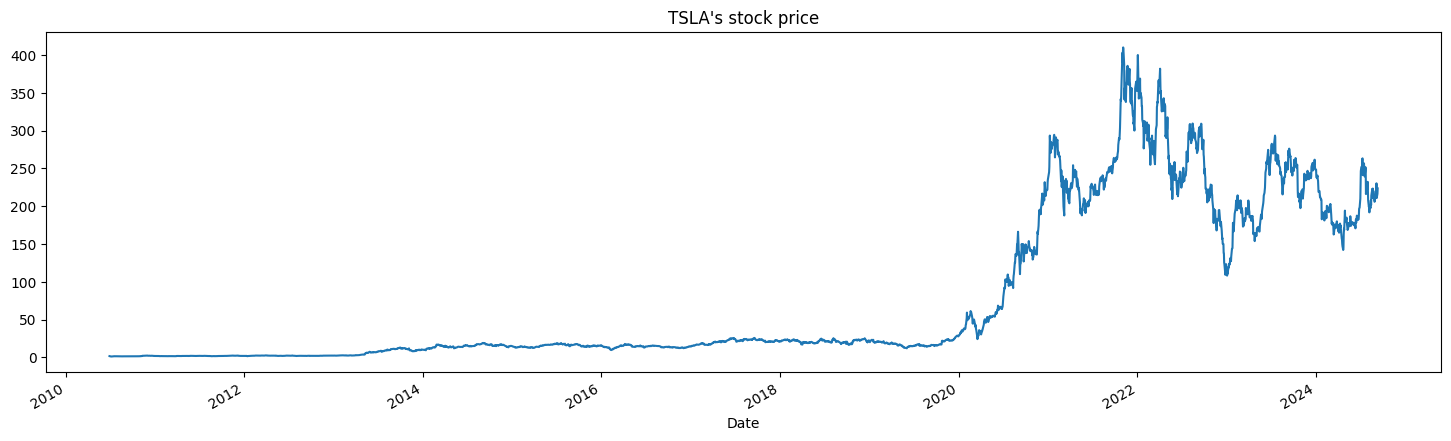

In [6]:
ticker = yf.Ticker('TSLA')
tsla_df2 = ticker.history(period="max")
plt.figure(figsize=(18,5))
tsla_df2['Close'].plot(title="TSLA's stock price")

# comparison of closing prices and adjusted closing price

In [7]:
start_date, tickers = '2010-01-01', ['F','XOM']
prices_df = yf.download(tickers, start=start_date, progress=False, auto_adjust=False)
display(prices_df.head())
prices_df = yf.download(tickers, start=start_date, progress=True, auto_adjust=True)
display(prices_df.head())
display(prices_df.tail())

C:\Users\ellio\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\ellio\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Adj Close             Close              High               Low  \
                   F        XOM      F        XOM      F        XOM      F   
Date                                                                         
2010-01-04  5.756344  39.594818  10.28  69.150002  10.28  69.260002  10.05   
2010-01-05  6.137111  39.749409  10.96  69.419998  11.24  69.449997  10.40   
2010-01-06  6.366693  40.092972  11.37  70.019997  11.46  70.599998  11.13   
2010-01-07  6.529082  39.967010  11.66  69.800003  11.69  70.059998  11.32   
2010-01-08  6.545880  39.806671  11.69  69.519997  11.74  69.750000  11.46   

                        Open                Volume            
                  XOM      F        XOM          F       XOM  
Date                                                          
2010-01-04  68.190002  10.17  68.720001   60855800  27809100  
2010-01-05  68.800003  10.45  69.190002  215620200  30174700  
2010-01-06  69.339996  11.21  69.449997  200070600  35044700  
2010-01-07  69.419998  11.46  69.900002  130201700  27192100  
2010-01-08  69.220001  11.67  69.690002  130463000  24891800

C:\Users\ellio\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\ellio\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed


Close                 High                  Low             \
                   F        XOM         F        XOM         F        XOM   
Date                                                                        
2010-01-04  5.756342  39.594810  5.756342  39.657796  5.627553  39.045122   
2010-01-05  6.137114  39.749413  6.293901  39.766590  5.823539  39.394408   
2010-01-06  6.366695  40.092972  6.417091  40.425077  6.232306  39.703608   
2010-01-07  6.529082  39.967010  6.545880  40.115882  6.338697  39.749422   
2010-01-08  6.545882  39.806664  6.573880  39.938362  6.417093  39.634888   

                Open                Volume            
                   F        XOM          F       XOM  
Date                                                  
2010-01-04  5.694747  39.348595   60855800  27809100  
2010-01-05  5.851537  39.617719  215620200  30174700  
2010-01-06  6.277102  39.766594  200070600  35044700  
2010-01-07  6.417091  40.024269  130201700  27192100  
2010-01-08  6.534683  39.904008  130463000  24891800

Close                High                Low               Open  \
                 F         XOM       F         XOM      F         XOM      F   
Date                                                                           
2024-09-04  10.950  114.059998  11.160  116.150002  10.85  113.980003  10.99   
2024-09-05  10.770  113.169998  11.140  115.279999  10.72  113.070000  11.08   
2024-09-06  10.580  112.639999  10.870  114.180000  10.53  111.730003  10.78   
2024-09-09  10.660  115.010002  10.760  116.150002  10.54  112.660004  10.61   
2024-09-10  10.325  110.995003  10.455  115.400002  10.17  110.169998  10.49   

                          Volume            
                   XOM         F       XOM  
Date                                        
2024-09-04  115.290001  47900700  12620600  
2024-09-05  115.070000  50551900  17200800  
2024-09-06  113.589996  47508900  13467700  
2024-09-09  112.870003  39189700  21644200  
2024-09-10  115.099998  46970729  13252762

In [8]:
import pickle
pickle.dump(prices_df, open("prices.pkl",'wb'))

# compare arithmetic versus geometric returns

In [9]:
from math import log
display(prices_df[:3])

f"Jan 6, 2020 geometric return = {log(8.005848 / 7.717158):0.6f}, arithmetic return = {(8.005848 - 7.717158) /7.717158:0.6f}"

Close                 High                  Low             \
                   F        XOM         F        XOM         F        XOM   
Date                                                                        
2010-01-04  5.756342  39.594810  5.756342  39.657796  5.627553  39.045122   
2010-01-05  6.137114  39.749413  6.293901  39.766590  5.823539  39.394408   
2010-01-06  6.366695  40.092972  6.417091  40.425077  6.232306  39.703608   

                Open                Volume            
                   F        XOM          F       XOM  
Date                                                  
2010-01-04  5.694747  39.348595   60855800  27809100  
2010-01-05  5.851537  39.617719  215620200  30174700  
2010-01-06  6.277102  39.766594  200070600  35044700

'Jan 6, 2020 geometric return = 0.036726, arithmetic return = 0.037409'

# calculate daily returns

In [10]:
from math import log

prices_f = prices_df[[('Close','F')]].squeeze()   # convert from dataframe to series
returns_f = prices_f.apply(log).diff()              # compute first order differences in the log prices = daily return
returns_f

Date
2010-01-04         NaN
2010-01-05    0.064052
2010-01-06    0.036726
2010-01-07    0.025186
2010-01-08    0.002570
                ...   
2024-09-04   -0.002736
2024-09-05   -0.016575
2024-09-06   -0.017799
2024-09-09    0.007533
2024-09-10   -0.031930
Name: (Close, F), Length: 3696, dtype: float64

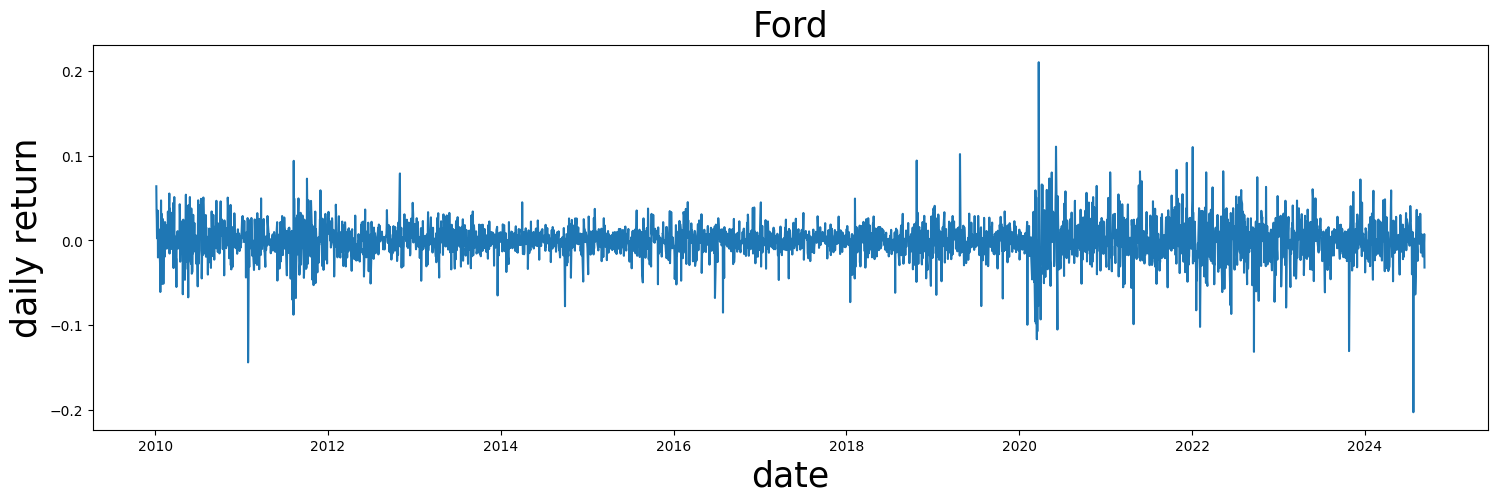

In [11]:
plt.figure(figsize=(18,5))
plt.plot(returns_f)
plt.title('Ford', fontsize=25)
plt.xlabel('date', fontsize=25)
plt.ylabel('daily return', fontsize=25)
plt.show()

# plot distribution of returns

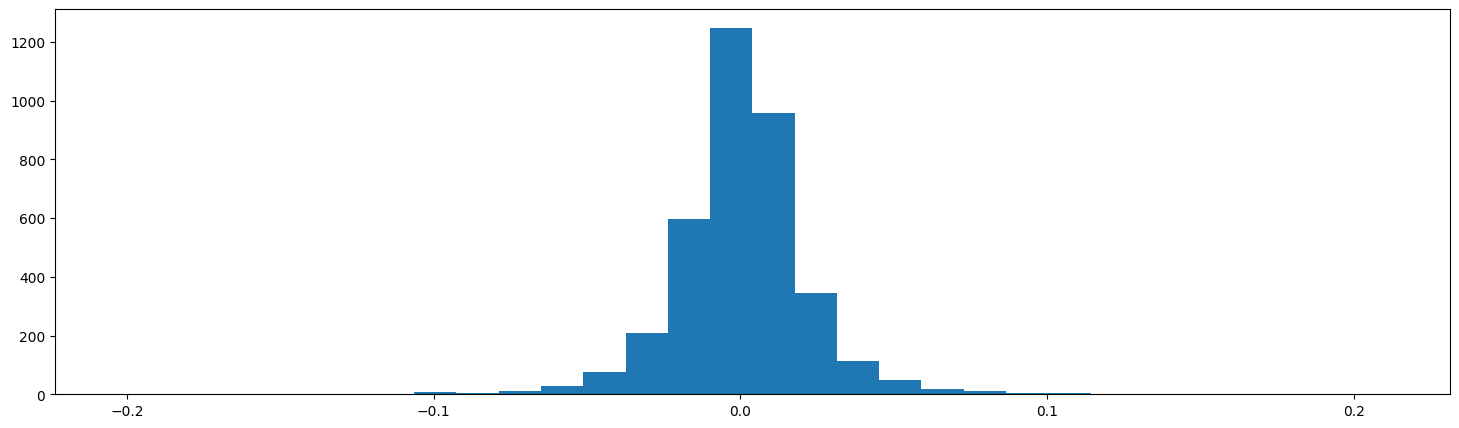

In [12]:
plt.figure(figsize=(18,5))
plt.hist(returns_f[1:],30)
plt.show()

In [13]:
import numpy as np
f"mean return = {np.mean(returns_f):0.6f} , return standard deviation = {np.std(returns_f):0.6f}"

'mean return = 0.000158 , return standard deviation = 0.021625'

# Exxon returns

In [14]:
prices_xom = prices_df[[('Close','XOM')]].squeeze()   # convert from dataframe to series
returns_xom = prices_xom.apply(log).diff()              # compute first order differences in the log prices = daily return
returns_xom

Date
2010-01-04         NaN
2010-01-05    0.003897
2010-01-06    0.008606
2010-01-07   -0.003147
2010-01-08   -0.004020
                ...   
2024-09-04   -0.012286
2024-09-05   -0.007834
2024-09-06   -0.004694
2024-09-09    0.020822
2024-09-10   -0.035534
Name: (Close, XOM), Length: 3696, dtype: float64

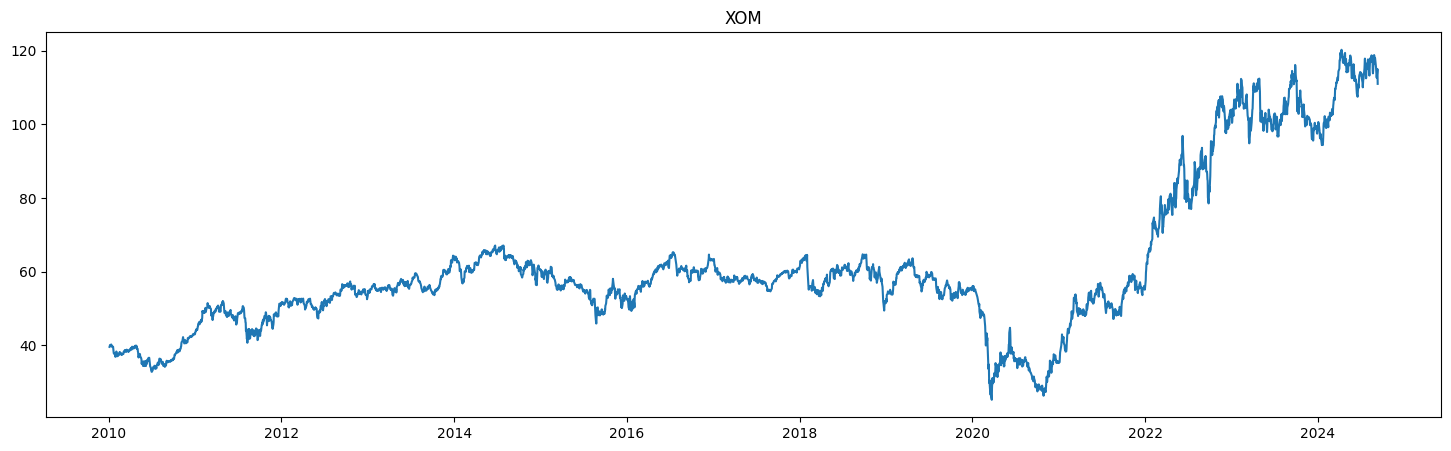

In [15]:
plt.figure(figsize=(18,5))
plt.plot(prices_df[[('Close','XOM')]])
plt.title("XOM")
plt.show()

# correlations of Ford and Exxon returns

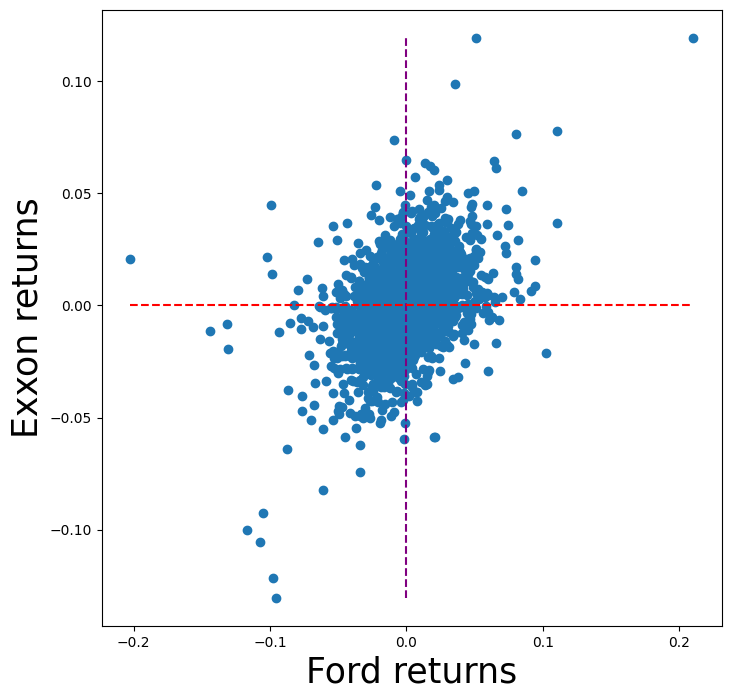

array([[1.       , 0.4498147],
       [0.4498147, 1.       ]])

In [16]:
import numpy as np

plt.figure(figsize=(8,8))
plt.plot(returns_f, returns_xom, 'o')
plt.xlabel('Ford returns', fontsize=25)
plt.ylabel('Exxon returns', fontsize=25)
plt.plot((0,0), (min(returns_xom[1:]), max(returns_xom[1:])),'--',color='purple')
plt.plot((min(returns_f[1:]), max(returns_f[1:])), (0,0),'--',color='red')
plt.show()

np.corrcoef(returns_f[1:], returns_xom[1:])